In [3]:
import torch
import pickle
shp_original_img = (100, 100)
broken_image = torch.FloatTensor(pickle.load(open('./broken_image_t.p', 'rb'), encoding='latin1'))

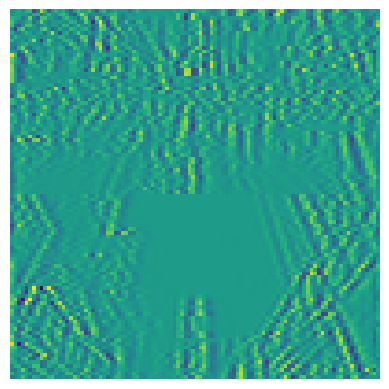

In [6]:
#오염된 이미지
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.imshow(broken_image.view(100,100))
plt.axis('off')
plt.show()

In [7]:
#이미지에 노이즈를 추가하는 함수
def weird_function(x, n_iter=5):
    h = x
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0) #텐서 연결
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat((h[h.shape[0] // 2:], h[:h.shape[0] // 2]), 0)
    return h

In [8]:
#손실 계산 함수
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)

In [12]:
#랜덤 이미지 텐서
random_tensor = torch.randn(10000, dtype=torch.float)
random_tensor

tensor([-1.6265, -0.3888,  1.4379,  ..., -0.6972, -0.4455,  0.9712])

In [13]:
lr = 0.8
for i in range(0, 20000):
    # 자동 미분 기능 on
    random_tensor.requires_grad_(True)
    # 이미지에 노이즈 추가
    hypothesis = weird_function(random_tensor)
    # 오차 계산
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    # 자동 미분 기능 off
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 12.088947296142578
Loss at 1000 = 1.1177196502685547
Loss at 2000 = 0.534041166305542
Loss at 3000 = 0.3732134699821472
Loss at 4000 = 0.296877920627594
Loss at 5000 = 0.24987027049064636
Loss at 6000 = 0.21596747636795044
Loss at 7000 = 0.1889144331216812
Loss at 8000 = 0.1658855527639389
Loss at 9000 = 0.1454182267189026
Loss at 10000 = 0.1266755312681198
Loss at 11000 = 0.10914634168148041
Loss at 12000 = 0.09250381588935852
Loss at 13000 = 0.07653066515922546
Loss at 14000 = 0.06107788905501366
Loss at 15000 = 0.046041328459978104
Loss at 16000 = 0.031349021941423416
Loss at 17000 = 0.02114437147974968
Loss at 18000 = 0.021165169775485992
Loss at 19000 = 0.02116718515753746


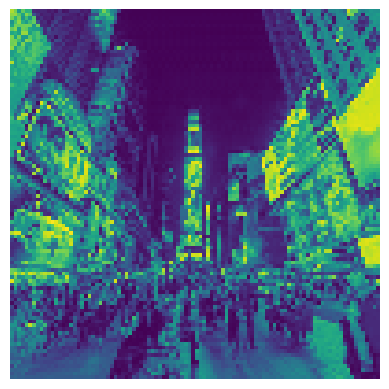

In [14]:
#복원된 이미지
plt.imshow(random_tensor.view(100, 100).data)
plt.axis('off')
plt.show()